In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
import matplotlib.pyplot as plt

In [ ]:
sequence = np.array([i for i in range(1, 101)])

# Define window size (e.g., 3 inputs 1 output)
window_size = 3

x = []

y = []

In [ ]:
for i in range(len(sequence)-window_size):
    x.append(sequence[i:i+window_size])
    y.append(sequence[i+window_size])


In [ ]:
x=np.array(x)
y=np.array(y)

In [ ]:
model=Sequential()
model.add(LSTM(50,activation='relu',input_shape=(window_size,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(x,y,epochs=1000,verbose=0)
print("Training complete")

Training complete


In [ ]:
test_input=np.array([8,9,10])
test_input=test_input.reshape(1,window_size,1)
predicted=model.predict(test_input,verbose=0)
print(f"predicted next number:{predicted[0][0]:.2f}")

predicted next number:10.89


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  


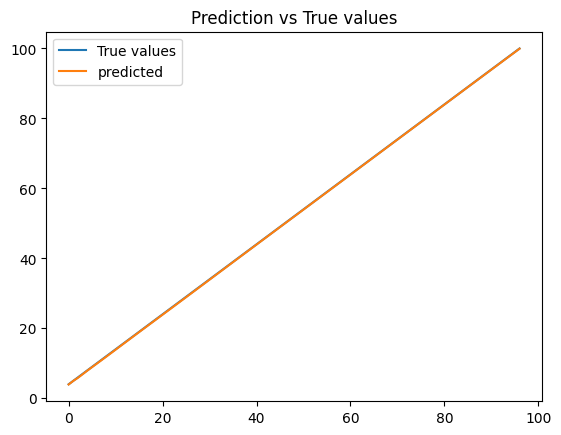

In [ ]:
# Reshape input for LSTM (samples, timesteps, features)
x_reshaped = x.reshape((x.shape[0], x.shape[1], 1))

predictions=model.predict(x_reshaped)
plt.plot(y,label='True values')
plt.plot(predictions,label='predicted')
plt.legend()
plt.title("Prediction vs True values")
plt.show()

In [ ]:
import pickle

# Convert model architecture to JSON
model_json = model.to_json()
# Get model weights as a list of numpy arrays
model_weights = model.get_weights()

# Save both architecture and weights to a .pkl file
with open("model.pkl", "wb") as f:
    pickle.dump((model_json, model_weights), f)

print("✅ Keras model saved as model.pkl")

✅ Keras model saved as model.pkl


In [ ]:
#using RNN
from google.colab import files
uploaded = files.upload()

Saving model (1).pkl to model (1).pkl


In [ ]:
import pickle
from tensorflow.keras.models import model_from_json
import numpy as np

# Load the .pkl file
with open('model.pkl', 'rb') as f:
    model_json, model_weights = pickle.load(f)

# Reconstruct the model
model = model_from_json(model_json)
model.set_weights(model_weights)
model.compile(optimizer='adam', loss='mse')

# ✅ Test the model
window_size = 3
test_input = np.array([45,46,47])
test_input = test_input.reshape((1, window_size, 1))

predicted = model.predict(test_input, verbose=0)
print(f"Predicted next number: {predicted[0][0]:.2f}")

Predicted next number: 47.94
